In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm
import plot_recipes as plr

In [27]:
def lucky_bvf(z_i):
    with open('../support_data/bvs_lucky.pkl', 'rb') as f:
        ambient_stratification = pickle.load(f)

    z_lucky = ambient_stratification['z']
    bvf = ambient_stratification['BVF']
    aux = abs(z_lucky - z_i)
    jj = np.where(aux == np.amin(aux))
    bvf_lucky = bvf[jj].data[0] #s^-1
    return bvf_lucky

In [28]:
lat = 37 + .17/.6
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

N_z_min = lucky_bvf(800)*3600*24 # days-1
N_z_max = lucky_bvf(1700)*3600*24 # days-1

upper_tick_locations = np.array([N_z_min, N_z_max, M6, M4, M2, f, week, month, yearly])
upper_tick_labels = ['$N_{max}$', '$N_{min}$', 'M6', 'M4', 'M2', 'f', 'week', 'month', 'year']

upper_tick_locations_zoom = np.array([M2, M4, M6, f, 1])
upper_tick_labels_zoom = ['M2', 'M4', 'M6', 'f', 'day']

# RBR depth comparison 

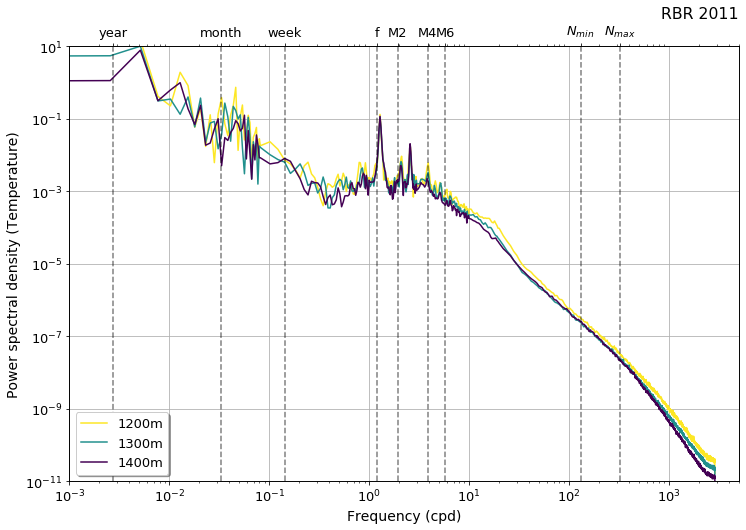

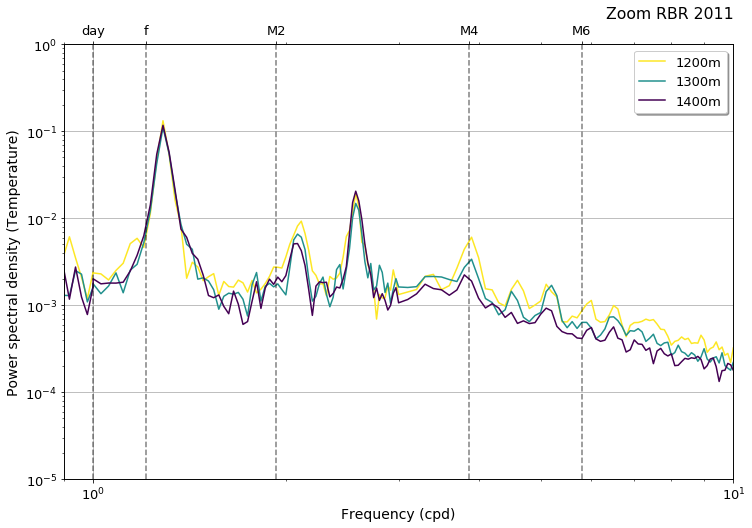

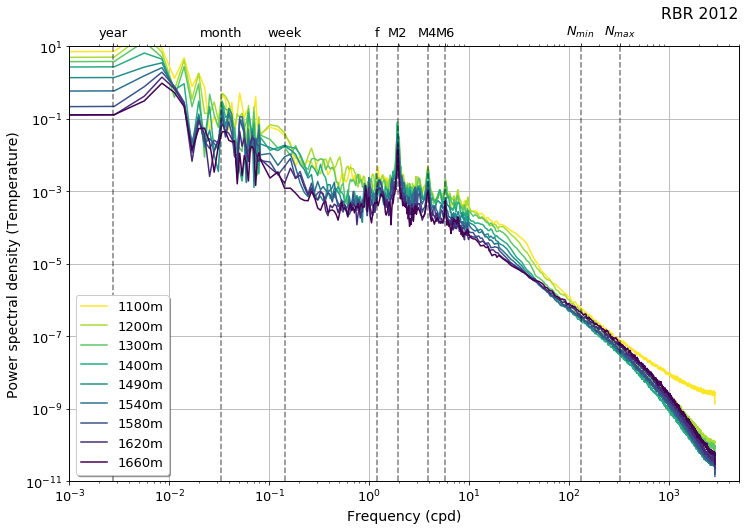

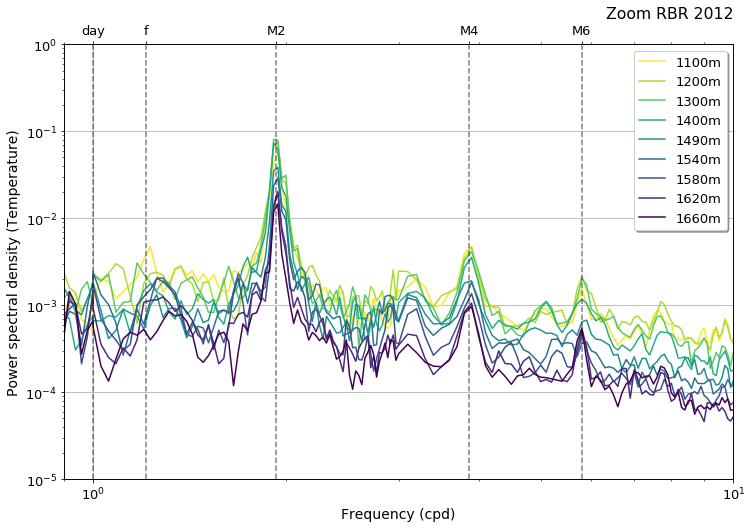

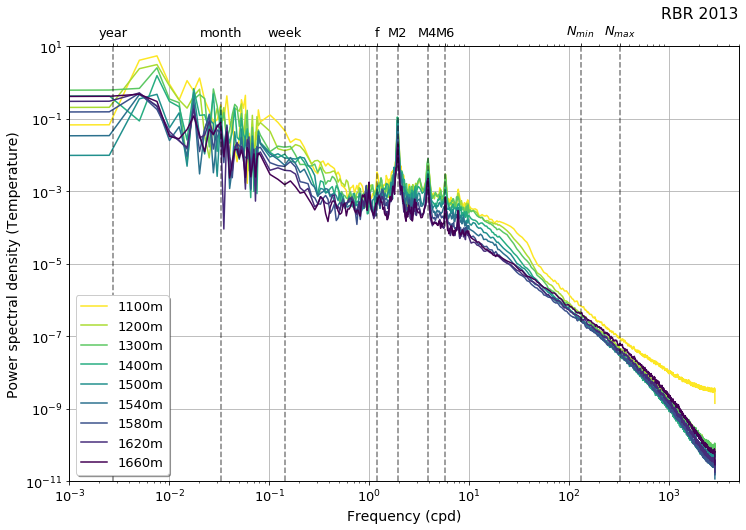

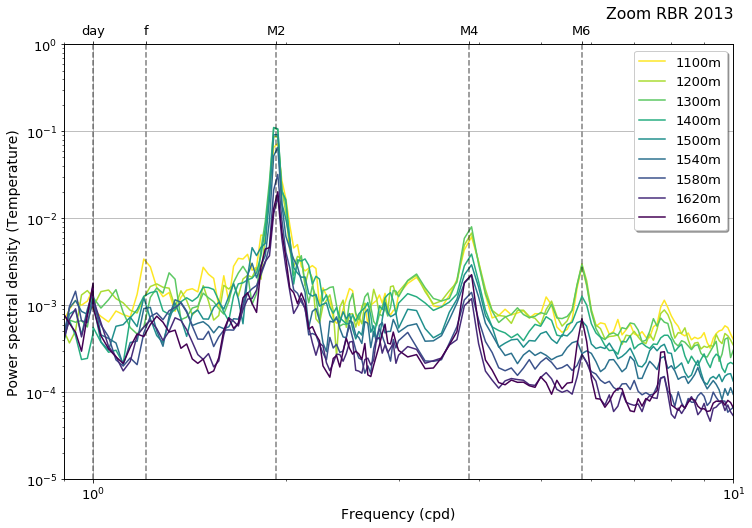

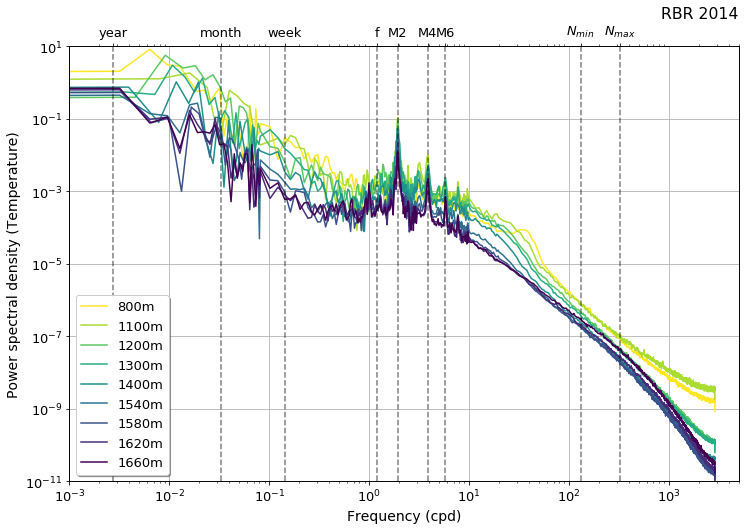

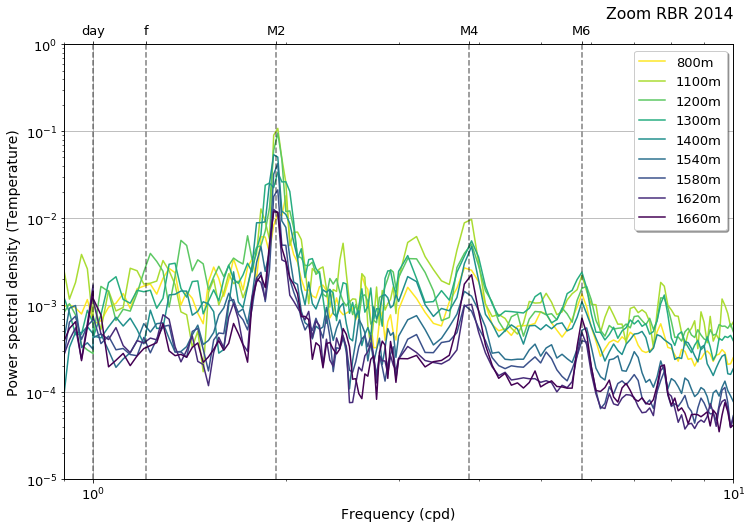

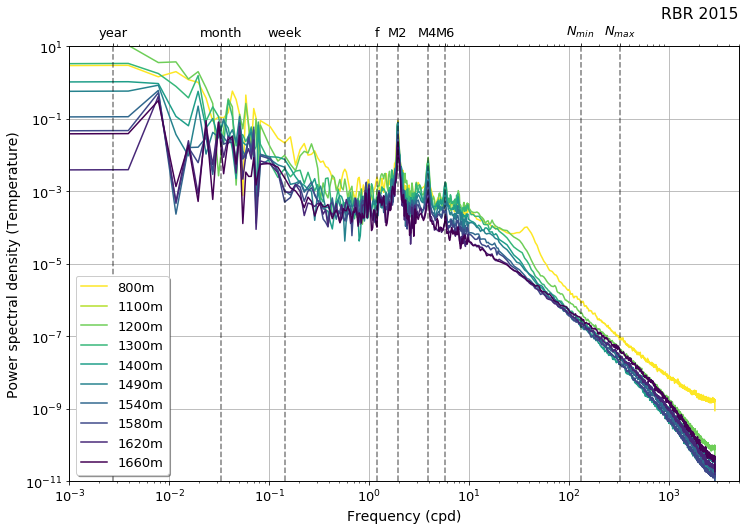

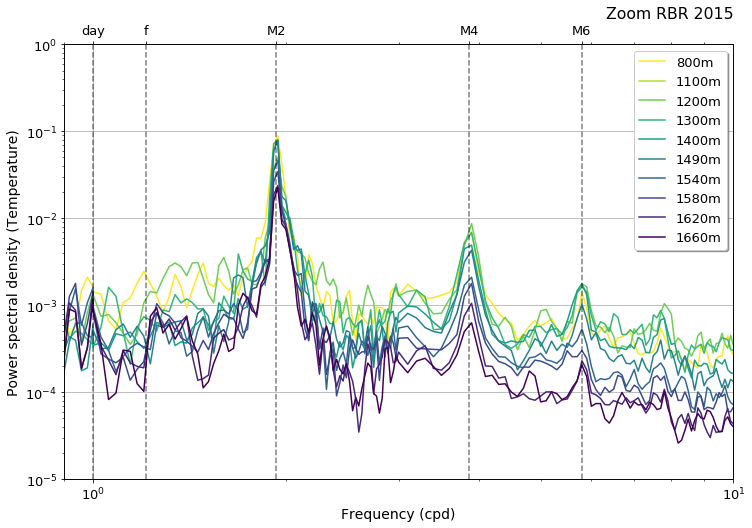

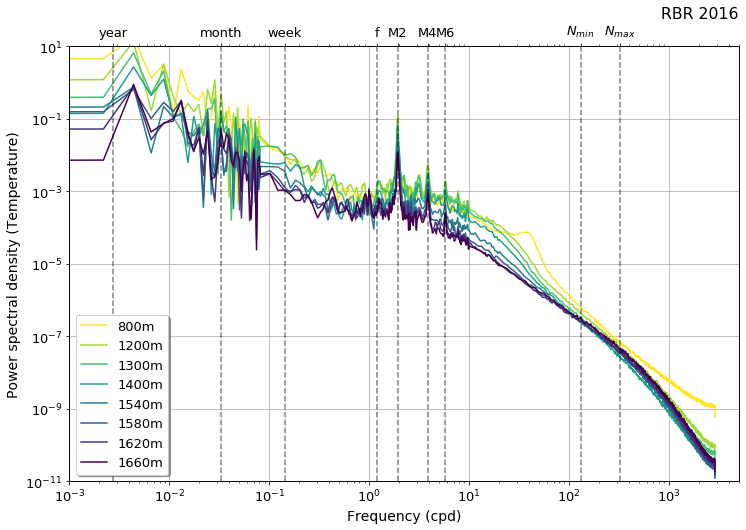

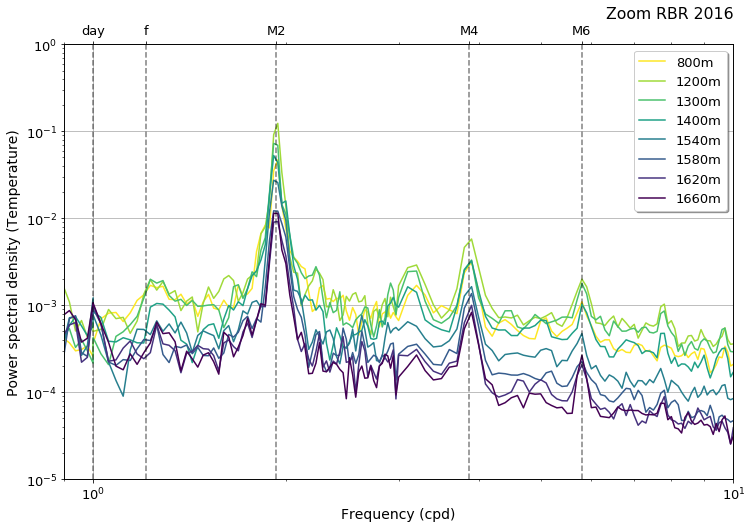

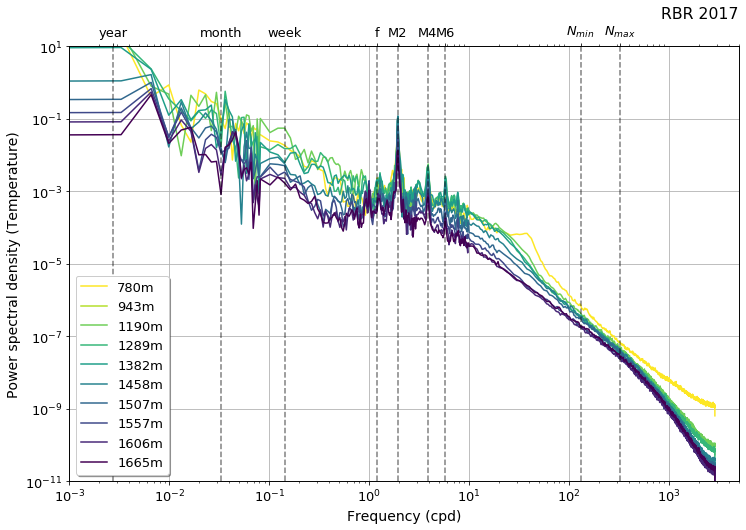

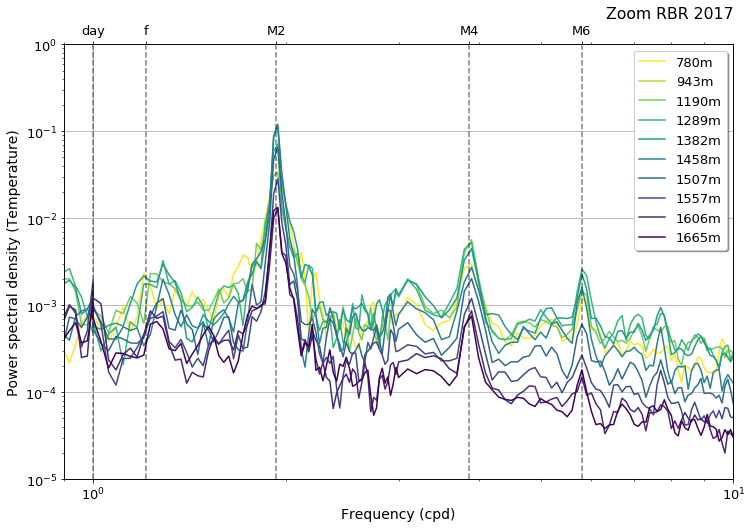

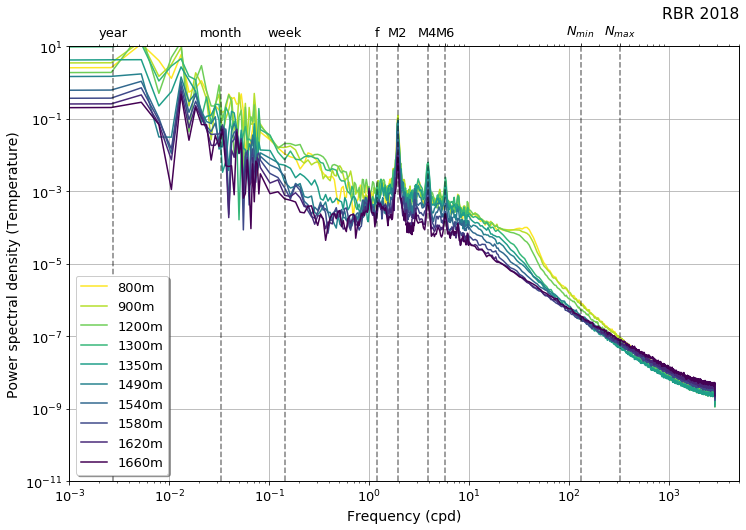

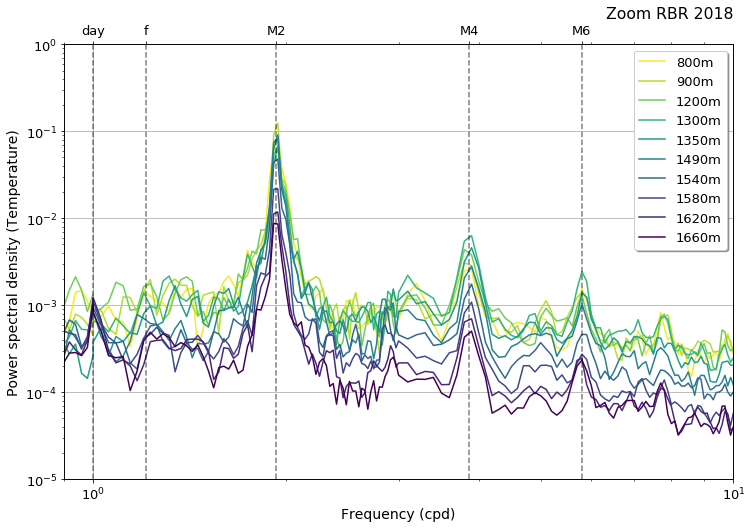

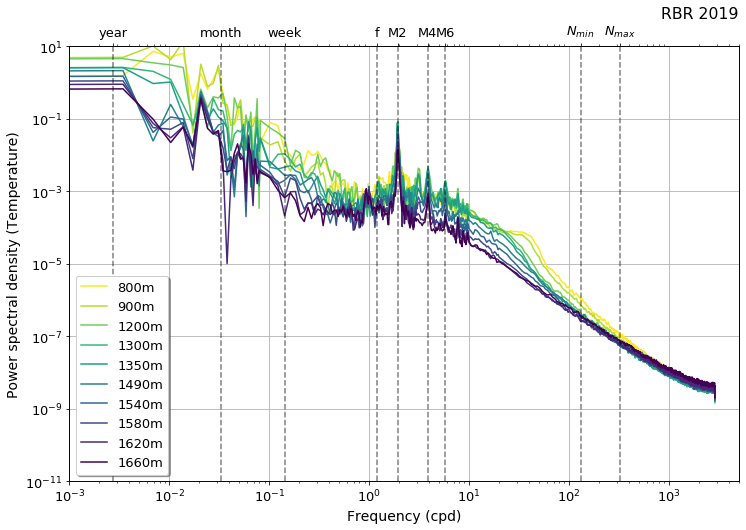

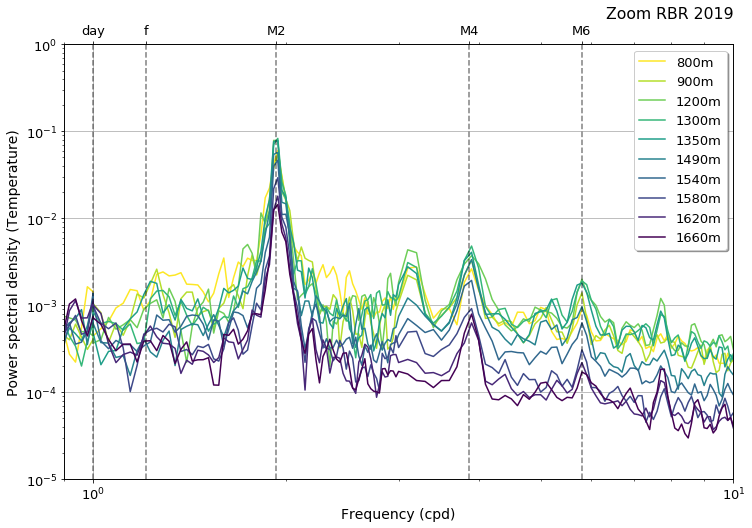

In [32]:
instrument = 'rbr' # 'rbr', 'sbe'
years = range(2011,2020)
colormap='viridis_r'

plt.rcParams.update({'font.size': 13})

for year in years:

    # PLOT 1
    #print(instrument, year)
    path = f'../support_data/PowerSpectra/psd_{instrument}_{year}'
    with open(path, 'rb') as f:
        PowerSpectra= pickle.load(f)

    # PLOT
    x_colors = np.linspace(0, 1, len(PowerSpectra.keys()))
    colors = cm.get_cmap(colormap)(x_colors)


    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(PowerSpectra.keys())):
    #for depth in sorted(PowerSpectra.keys()):
        ax1.loglog(PowerSpectra[depth]['freq'],
                   PowerSpectra[depth]['psd'],
                   label=f"{depth:0.0f}m",
                c=colors[j])

    ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
    ax1.set_xlim(1e-3, 5e3)
    ax1.set_ylim(1e-11,1e1)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations)
    ax2.set_xticklabels(upper_tick_labels, fontsize=13)
    ax1.legend(loc='lower left', shadow=True)
    ax1.set_title(f'{instrument.upper()} {year}', loc='right') # remove for publishing
    
    # ZOOM
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(PowerSpectra.keys())):
        ax1.loglog(PowerSpectra[depth]['freq'],
                   PowerSpectra[depth]['psd'],
                   label=f"{depth:0.0f}m",
                c=colors[j])

    ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations_zoom:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)

    ax1.set_xlim(0.9, 1e1)
    ax2.set_xlim(0.9, 1e1)

    ax1.set_ylim(1e-5,1e0)
    ax2.set_ylim(1e-5,1e0)

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations_zoom)
    ax2.set_xticklabels(upper_tick_labels_zoom, fontsize=13)
    ax1.legend(loc='upper right', shadow=True)
    ax1.set_title(f'Zoom {instrument.upper()} {year}', loc='right') # remove for publishing
    

# SBE depth comparison 

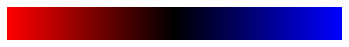

In [30]:
blured = plr.custom_cmap(['red', 'black', 'blue'])
plr.display_cmap(blured)

 horrible but it does the job.

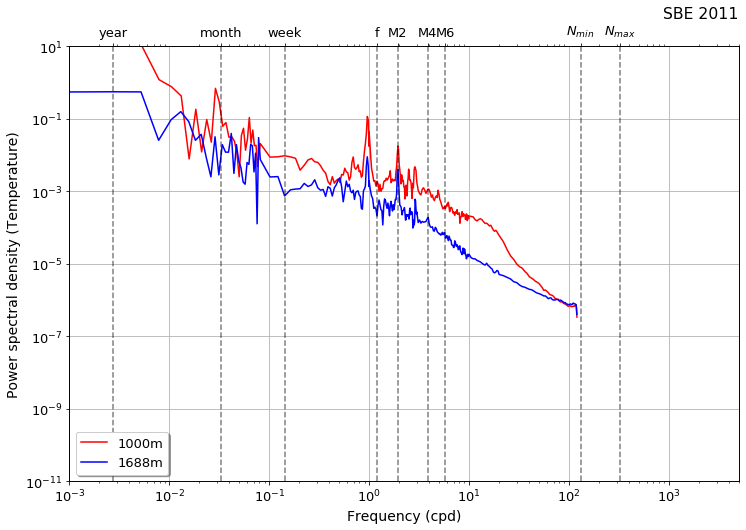

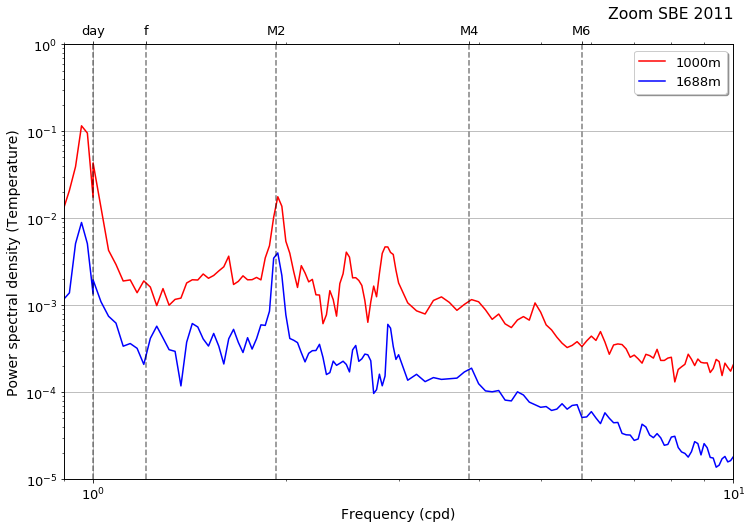

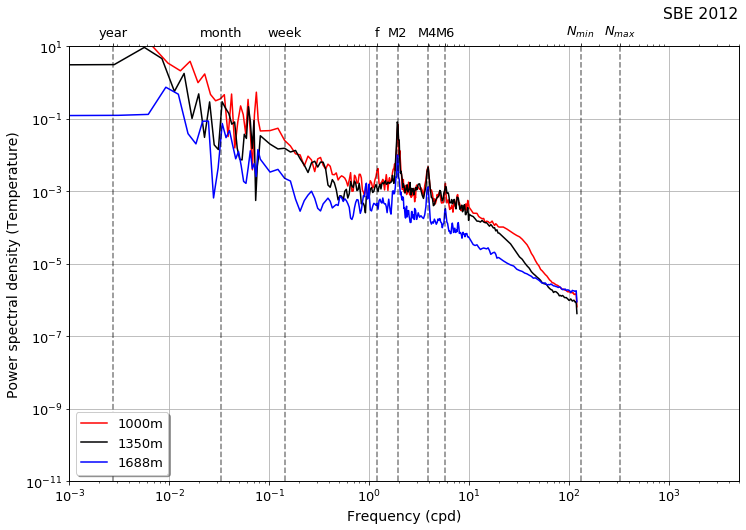

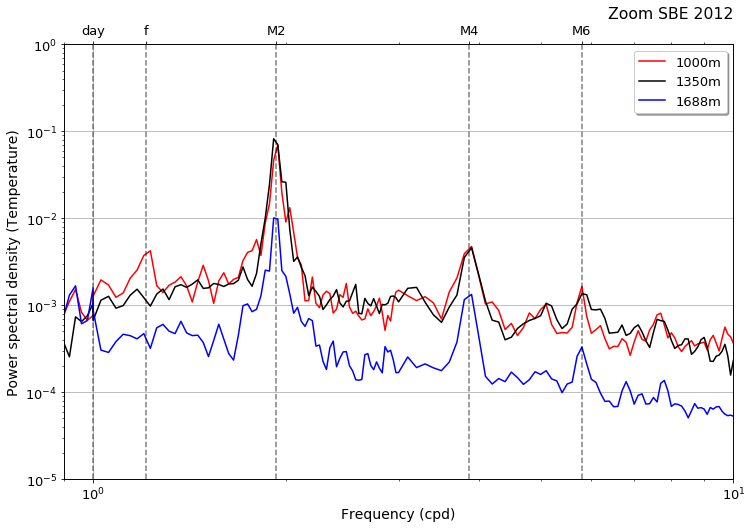

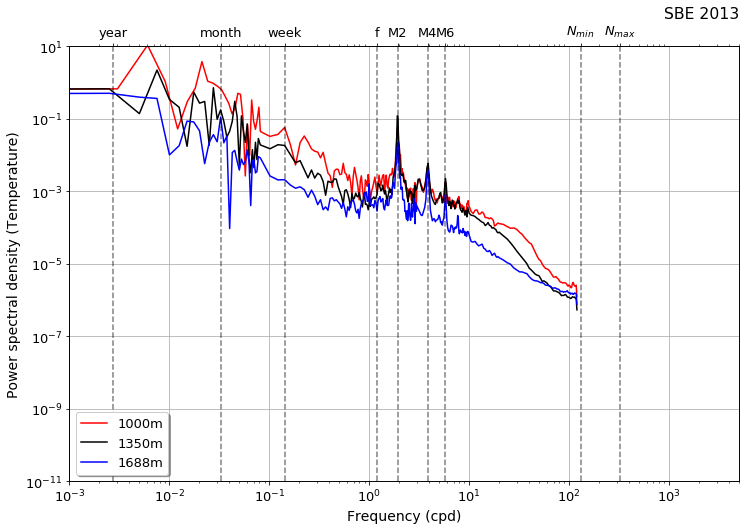

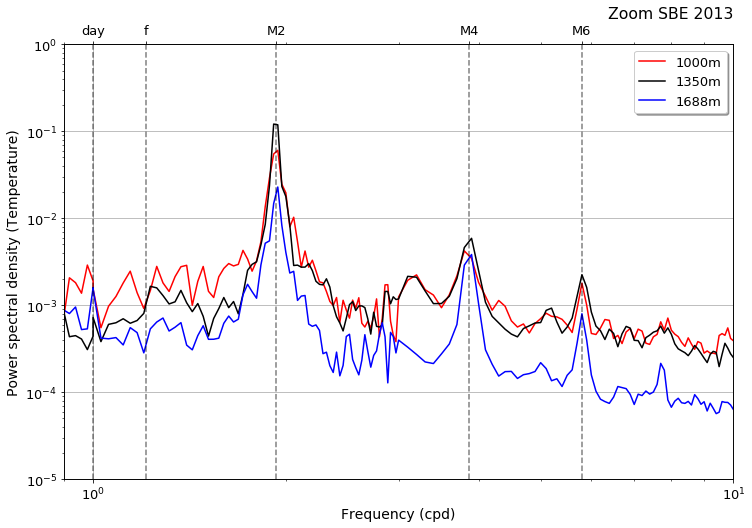

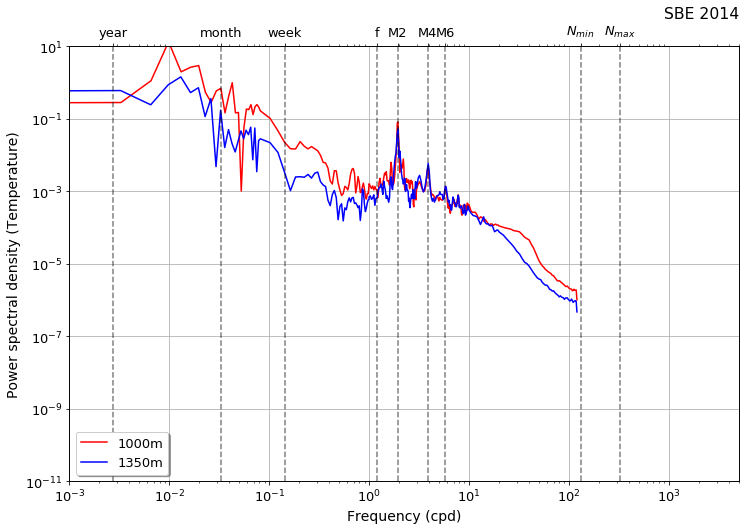

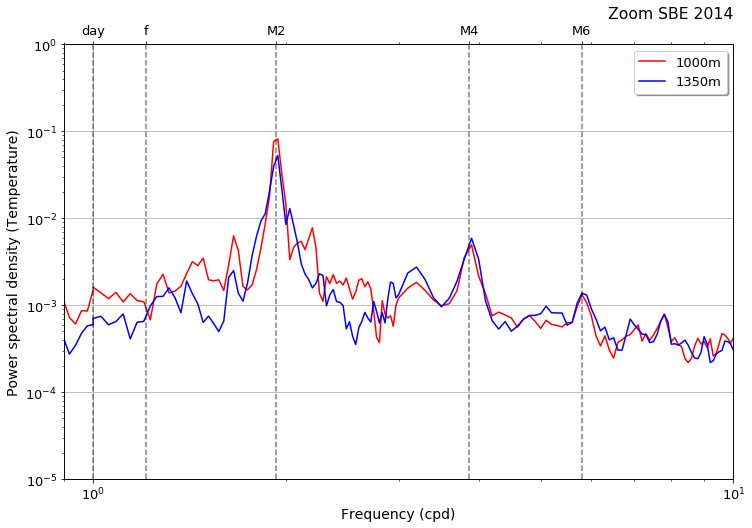

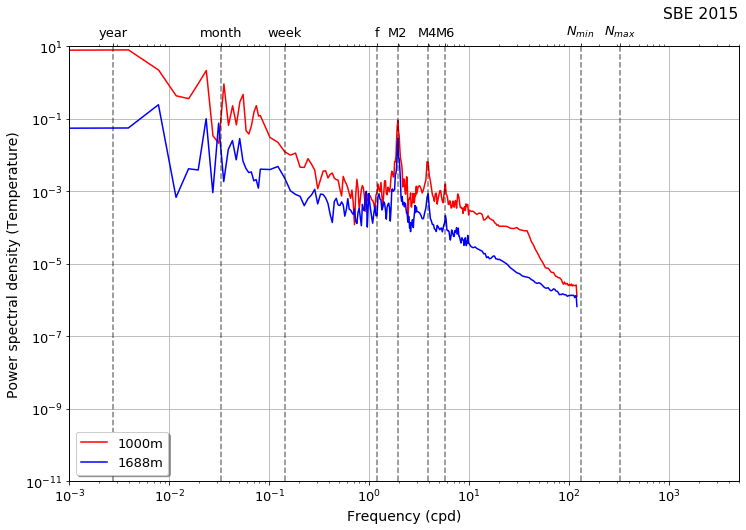

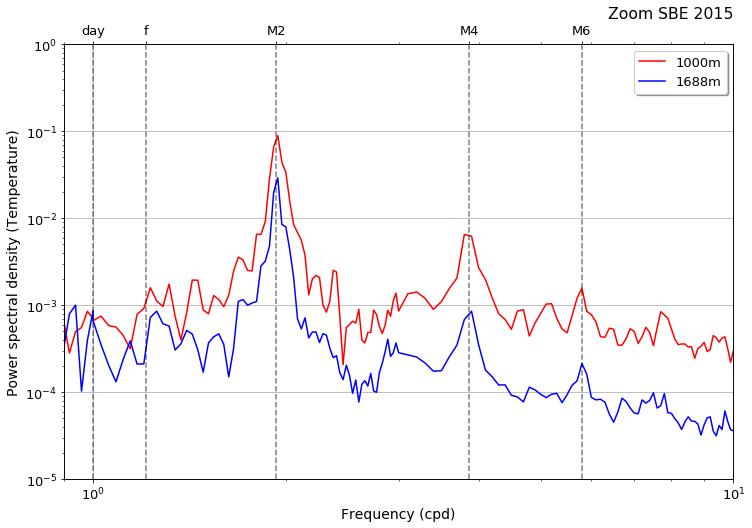

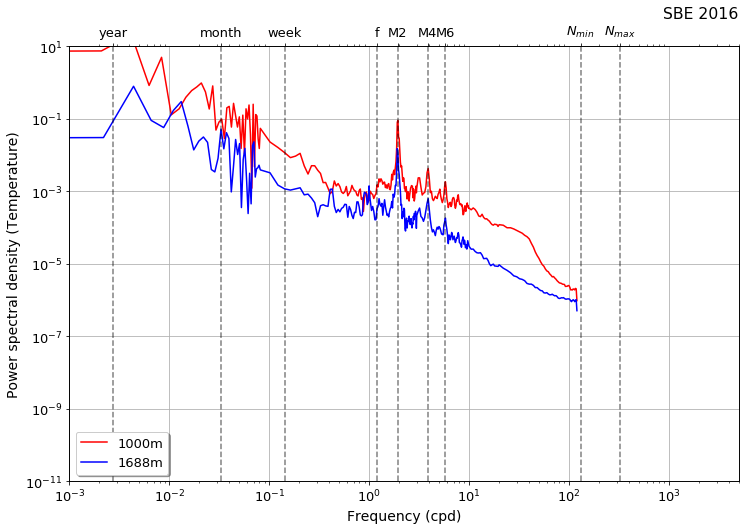

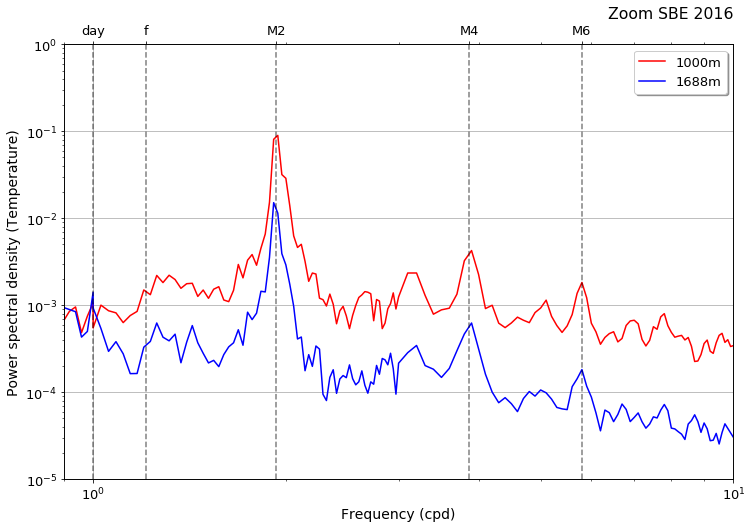

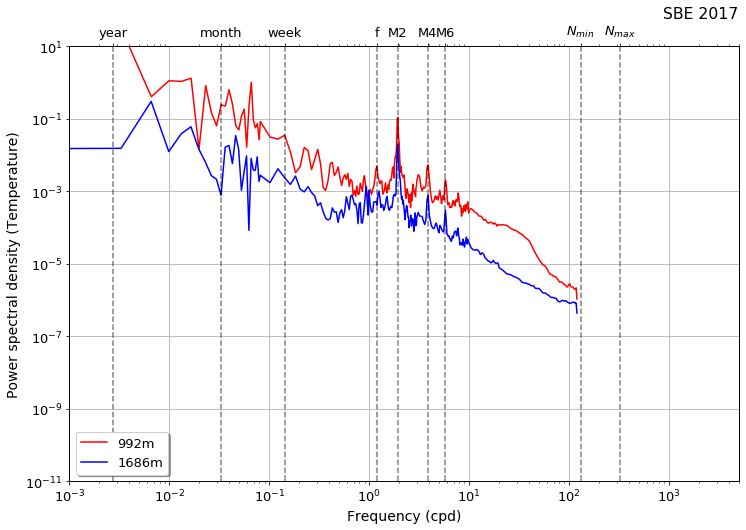

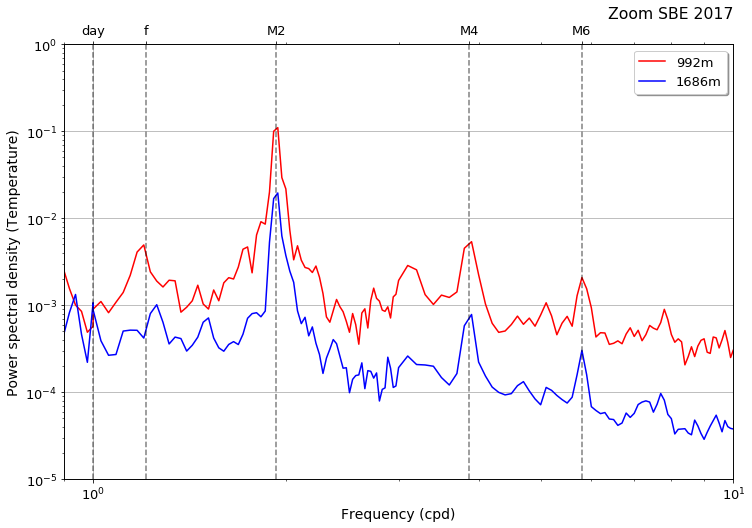

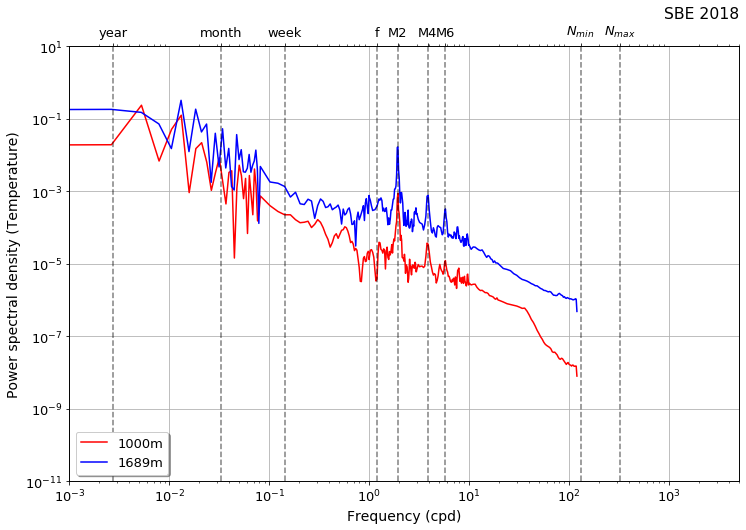

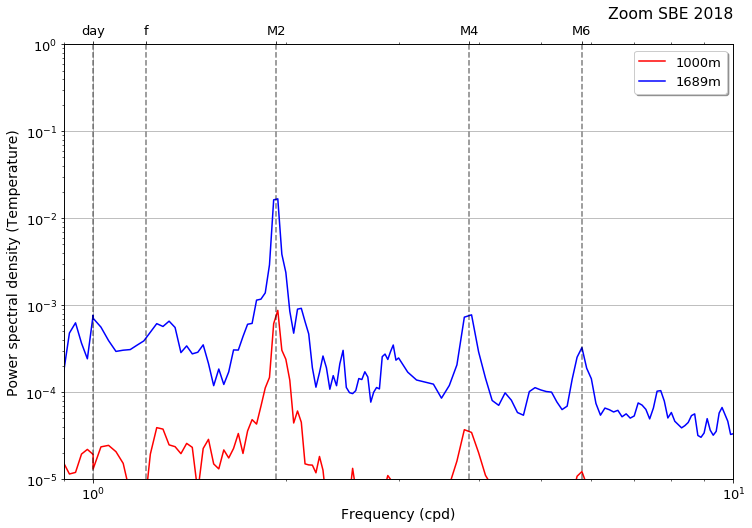

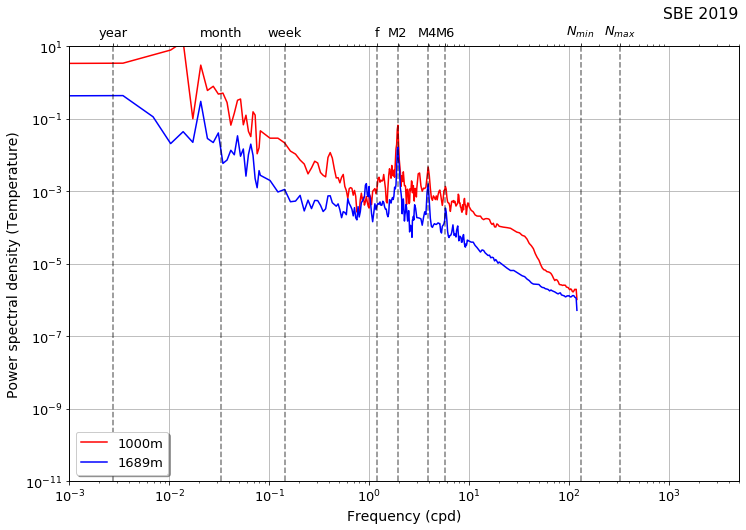

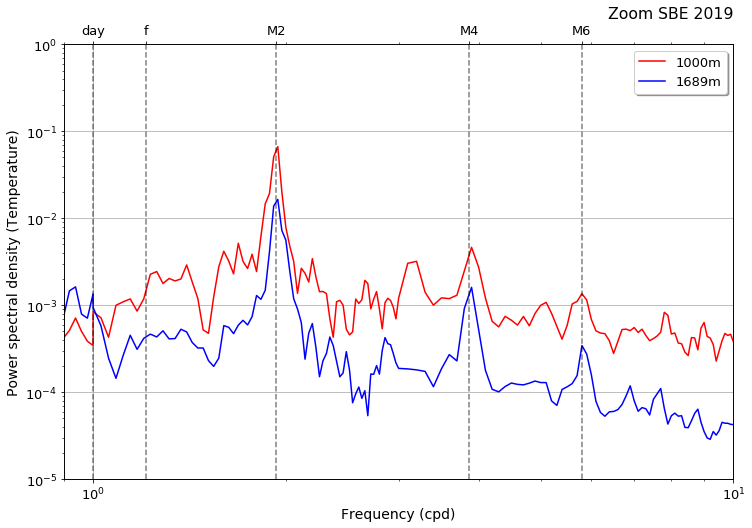

In [31]:
instrument = 'sbe' # 'rbr', 'sbe'
years = range(2011,2020)
colormap = blured

plt.rcParams.update({'font.size': 13})

for year in years:

    # PLOT 1
    #print(instrument, year)
    path = f'../support_data/PowerSpectra/psd_{instrument}_{year}'
    with open(path, 'rb') as f:
        PowerSpectra= pickle.load(f)

    # PLOT
    x_colors = np.linspace(0, 1, len(PowerSpectra.keys()))
    colors = cm.get_cmap(colormap)(x_colors)


    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(PowerSpectra.keys())):
    #for depth in sorted(PowerSpectra.keys()):
        ax1.loglog(PowerSpectra[depth]['freq'],
                   PowerSpectra[depth]['psd'],
                   label=f"{depth:0.0f}m",
                c=colors[j])

    ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
    ax1.set_xlim(1e-3, 5e3)
    ax1.set_ylim(1e-11,1e1)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations)
    ax2.set_xticklabels(upper_tick_labels, fontsize=13)
    ax1.legend(loc='lower left', shadow=True)
    ax1.set_title(f'{instrument.upper()} {year}', loc='right') # remove for publishing
    
    # ZOOM
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(PowerSpectra.keys())):
        ax1.loglog(PowerSpectra[depth]['freq'],
                   PowerSpectra[depth]['psd'],
                   label=f"{depth:0.0f}m",
                c=colors[j])

    ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations_zoom:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)

    ax1.set_xlim(0.9, 1e1)
    ax2.set_xlim(0.9, 1e1)

    ax1.set_ylim(1e-5,1e0)
    ax2.set_ylim(1e-5,1e0)

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations_zoom)
    ax2.set_xticklabels(upper_tick_labels_zoom, fontsize=13)
    ax1.legend(loc='upper right', shadow=True)
    ax1.set_title(f'Zoom {instrument.upper()} {year}', loc='right') # remove for publishing
    